# Data Analysis and Data Science using Python Task 2

### Project 1: General EDA

#### Required Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Loading the dataset

In [3]:
data=pd.read_csv(r"C:\Users\koust\OneDrive\Desktop\Jupyter\Main Flow\Task 2\Global_Superstore2.csv", encoding="ISO-8859-1")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


Taking only required columns

In [4]:
data=data[['Sales','Profit','Region','Category']]
data.head()

,Sales,Profit,Region,Category
0,2309.650,762.1845,East,Technology
1,3709.395,-288.7650,Oceania,Furniture
2,5175.171,919.9710,Oceania,Technology
3,2892.510,-96.5400,Central,Technology
4,2832.960,311.5200,Africa,Technology


#### Data Cleaning

In [5]:
#Checking for missing values
print(data.isnull().sum())

Sales       0
Profit      0
Region      0
Category    0
dtype: int64


In [6]:
#Removing Duplicates
data.drop_duplicates(inplace=True)

In [7]:
#Compute Z-score for numerical column

data_numeric=data[['Sales','Profit']]  #Only numerical columns for z-score
z_scores=np.abs(zscore(data_numeric))

#Set a threshold (commonly 3)
threshold=3
outliers= (z_scores > threshold).any(axis=1)

#Remove Outliers
data_cleaned=data[~outliers]

#Print before and after removal
print(f"Original dataset size: {data.shape[0]} rows")
print(f"Cleaned dataset size: {data_cleaned.shape[0]} rows")

Original dataset size: 44992 rows
Cleaned dataset size: 43752 rows


### Statistical Analysis

In [8]:
#statistical Measures

data.describe()

,Sales,Profit
count,44992.000000,44992.000000
mean,260.446954,29.109357
std,509.195874,183.761612
min,0.444000,-6599.978000
25%,32.800000,-0.856350
50%,90.819000,9.315100
75%,266.898750,38.640000
max,22638.480000,8399.976000


In [9]:
#Select numerical columns for correlation analysis
numeric_cols = ["Sales", "Profit"]

#Compute correlation matrix
correlation_matrix = data[numeric_cols].corr()

#Display correlation values
print("Correlation Matrix: \n", correlation_matrix)

Correlation Matrix: 
            Sales    Profit
Sales   1.000000  0.481324
Profit  0.481324  1.000000


### Data Visualization

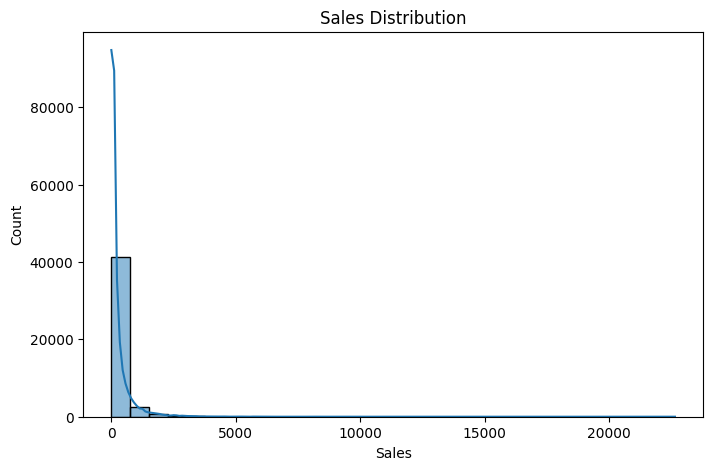

In [10]:
# Histogram for Sales

plt.figure(figsize=(8,5))
sns.histplot(data['Sales'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.show()

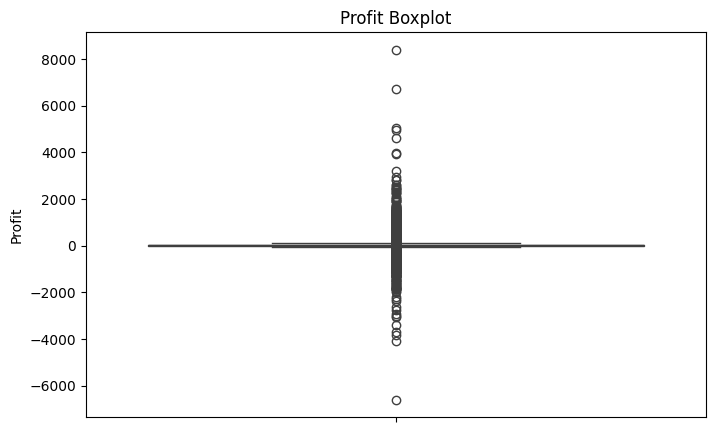

In [11]:
#Βοxρlot to detect outliers in Profit

plt.figure(figsize=(8,5))
sns.boxplot(y=data['Profit'])
plt.title("Profit Boxplot")
plt.show()

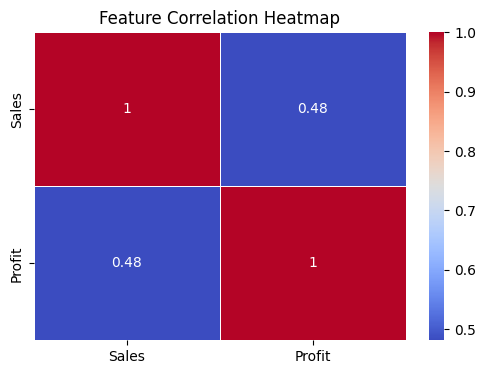

In [12]:
# Heatmap to visualize correlations
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Insights and Summary -

1. Identify key trends in Sales and Profit.
2. Highlight any anomalies or outliers.
3. Make recommendations based on findings.

## Project 2: Sales Performance Analysis

### Loading and Exploring Dataset

In [14]:
# Load the dataset
df=pd.read_csv(r"C:\Users\koust\OneDrive\Desktop\Jupyter\Main Flow\Task 2\Global_Superstore2.csv", encoding="ISO-8859-1")

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [15]:
df=df[["Product Name","Region","Sales","Profit","Discount","Category","Order Date"]]
df

,Product Name,Region,Sales,Profit,Discount,Category,Order Date
0,Plantronics CS510 - Over-the-Head monaural Wir...,East,2309.650,762.1845,0.0,Technology,31-07-2012
1,"Novimex Executive Leather Armchair, Black",Oceania,3709.395,-288.7650,0.1,Furniture,05-02-2013
2,"Nokia Smart Phone, with Caller ID",Oceania,5175.171,919.9710,0.1,Technology,17-10-2013
3,"Motorola Smart Phone, Cordless",Central,2892.510,-96.5400,0.1,Technology,28-01-2013
4,"Sharp Wireless Fax, High-Speed",Africa,2832.960,311.5200,0.0,Technology,05-11-2013
...,...,...,...,...,...,...,...
51285,"Advantus Thumb Tacks, 12 Pack",North Asia,65.100,4.5000,0.0,Office Supplies,19-06-2014
51286,Hoover Replacement Belt for Commercial Guardsm...,Central,0.444,-1.1100,0.8,Office Supplies,20-06-2014
51287,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",West,22.920,11.2308,0.0,Office Supplies,02-12-2013
51288,"Acco Index Tab, Economy",South,13.440,2.4000,0.0,Office Supplies,18-02-2012


In [38]:
print(df.shape)  #Shape of dataset
print(df.dtypes)  # Data Types

(51274, 7)
Product Name            object
Region                  object
Sales                  float64
Profit                 float64
Discount               float64
Category                object
Order Date      datetime64[ns]
dtype: object


In [39]:
# Statistical summary of numerical columns
df.describe()

,Sales,Profit,Discount,Order Date
count,51274.000000,51274.000000,51274.000000,51274
mean,246.528379,28.614344,0.142910,2013-05-11 21:52:14.641338624
min,0.444000,-6599.978000,0.000000,2011-01-01 00:00:00
25%,30.771000,0.000000,0.000000,2012-06-19 00:00:00
50%,85.056000,9.240000,0.000000,2013-07-08 00:00:00
75%,251.091900,36.810000,0.200000,2014-05-22 00:00:00
max,22638.480000,8399.976000,0.850000,2014-12-31 00:00:00
std,487.628521,174.367008,0.212283,NaN


In [19]:
#Missing Values
df.isnull().sum()

Product Name    0
Region          0
Sales           0
Profit          0
Discount        0
Category        0
Order Date      0
dtype: int64

### Data Cleaning

In [20]:
#Check for duplicates
duplicates=df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 16


In [21]:
#Remove duplicates
df=df.drop_duplicates()

In [22]:
# Convert 'Date' column to datetime format 
df['Order Date'] = pd.to_datetime (df['Order Date'])

In [23]:
# Verify the changes
print("\nData after cleaning:")
display(df.head())


Data after cleaning:


,Product Name,Region,Sales,Profit,Discount,Category,Order Date
0,Plantronics CS510 - Over-the-Head monaural Wir...,East,2309.650,762.1845,0.0,Technology,2012-07-31
1,"Novimex Executive Leather Armchair, Black",Oceania,3709.395,-288.7650,0.1,Furniture,2013-02-05
2,"Nokia Smart Phone, with Caller ID",Oceania,5175.171,919.9710,0.1,Technology,2013-10-17
3,"Motorola Smart Phone, Cordless",Central,2892.510,-96.5400,0.1,Technology,2013-01-28
4,"Sharp Wireless Fax, High-Speed",Africa,2832.960,311.5200,0.0,Technology,2013-11-05


### Exploratory Data Analysis

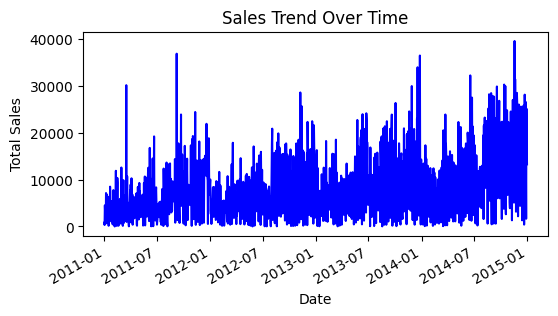

In [42]:
# Plot sales trends over time
plt.figure(figsize=(6,3))
df.groupby('Order Date')['Sales'].sum().plot(kind='line', color='blue')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

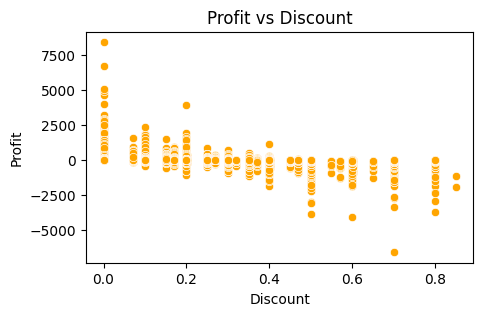

In [45]:
# Scatter plot: Profit vs Discount
plt.figure(figsize=(5, 3))
sns.scatterplot(x='Discount', y='Profit', data=df, color='orange')
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

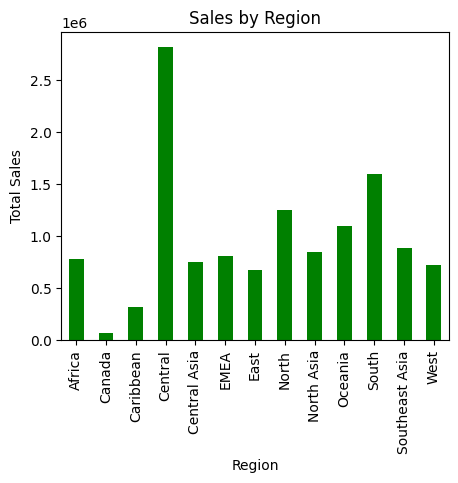

In [49]:
#Sales distribution by region
plt.figure(figsize=(5, 4))
region_sales=df.groupby('Region') ['Sales'].sum()
region_sales.plot(kind='bar', color='green')
plt.title('Sales by Region')
plt.ylabel('Total Sales')
plt.show()

### Predictive Modeling

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = df [['Profit', 'Discount']]
y= df ['Sales']

In [30]:
#Split the dataset into training and test sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Train the Linear Regression model

model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Make predictions
y_pred=model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.2f}")

Mean Squared Error: 191028.59
R-squared Score: 0.15
